<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session5/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 5 Pytorch
## Loading model, utility

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
!pip install torchsummary
!git clone https://github.com/sujitojha1/ERA1 -q --quiet
!mv ERA1/Session5/*.py .
!rm -rf ERA1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CODE BLOCK: 1

In [70]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [71]:
# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True


CODE BLOCK: 3

In [72]:
from utils import *

CODE BLOCK: 4

CODE BLOCK: 5

In [73]:
train_loader, test_loader = getDataLoader(batch_size=512)

CODE BLOCK: 6

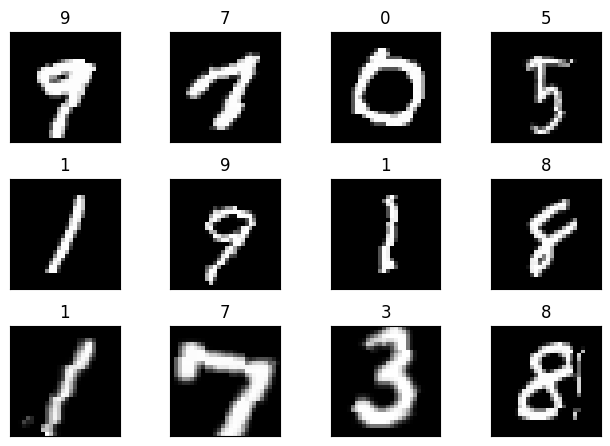

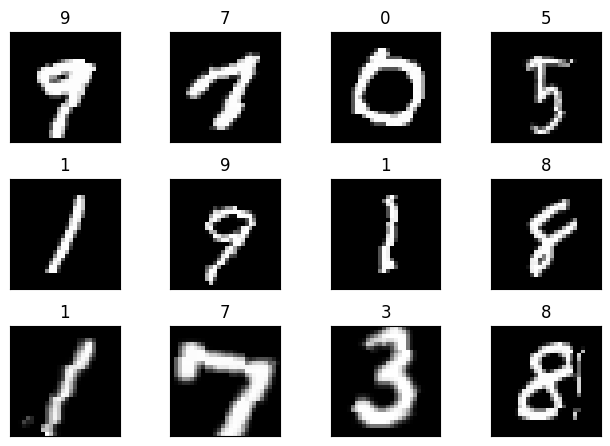

In [74]:
getSampleImages(train_loader)

CODE BLOCK: 7

In [75]:
from model import Net, training

CODE BLOCK: 8

CODE BLOCK: 9

CODE BLOCK: 10

In [76]:
from model import getModelSummary

model = Net().to(device)
getModelSummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [77]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.NLLLoss()
num_epochs = 20

train_losses, test_losses, train_acc, test_acc, test_incorrect_pred = training(model, device, num_epochs, train_loader, test_loader, optimizer, criterion)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2174 Batch_id=117 Accuracy=50.47: 100%|██████████| 118/118 [00:26<00:00,  4.39it/s]


Test set: Average loss: 0.0005, Accuracy: 9292/10000 (92.92%)

Epoch 2


Train: Loss=0.1423 Batch_id=117 Accuracy=93.86: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 0.0002, Accuracy: 9762/10000 (97.62%)

Epoch 3


Train: Loss=0.0689 Batch_id=117 Accuracy=96.60: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0001, Accuracy: 9801/10000 (98.01%)

Epoch 4


Train: Loss=0.0793 Batch_id=117 Accuracy=97.14: 100%|██████████| 118/118 [00:23<00:00,  5.13it/s]


Test set: Average loss: 0.0001, Accuracy: 9835/10000 (98.35%)

Epoch 5


Train: Loss=0.0774 Batch_id=117 Accuracy=97.61: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]


Test set: Average loss: 0.0001, Accuracy: 9849/10000 (98.49%)

Epoch 6


Train: Loss=0.0440 Batch_id=117 Accuracy=97.90: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0001, Accuracy: 9882/10000 (98.82%)

Epoch 7


Train: Loss=0.0147 Batch_id=117 Accuracy=98.07: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0001, Accuracy: 9904/10000 (99.04%)

Epoch 8


Train: Loss=0.0131 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:23<00:00,  5.05it/s]


Test set: Average loss: 0.0001, Accuracy: 9896/10000 (98.96%)

Epoch 9


Train: Loss=0.0753 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0001, Accuracy: 9904/10000 (99.04%)

Epoch 10


Train: Loss=0.0125 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0000, Accuracy: 9914/10000 (99.14%)

Epoch 11


Train: Loss=0.0925 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:22<00:00,  5.19it/s]


Test set: Average loss: 0.0001, Accuracy: 9914/10000 (99.14%)

Epoch 12


Train: Loss=0.0049 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:22<00:00,  5.16it/s]


Test set: Average loss: 0.0000, Accuracy: 9916/10000 (99.16%)

Epoch 13


Train: Loss=0.0456 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.0001, Accuracy: 9906/10000 (99.06%)

Epoch 14


Train: Loss=0.0377 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0000, Accuracy: 9929/10000 (99.29%)

Epoch 15


Train: Loss=0.0716 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0001, Accuracy: 9911/10000 (99.11%)

Epoch 16


Train: Loss=0.0162 Batch_id=117 Accuracy=98.92: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0000, Accuracy: 9923/10000 (99.23%)

Epoch 17


Train: Loss=0.0033 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0000, Accuracy: 9927/10000 (99.27%)

Epoch 18


Train: Loss=0.0843 Batch_id=117 Accuracy=99.04: 100%|██████████| 118/118 [00:23<00:00,  5.01it/s]


Test set: Average loss: 0.0000, Accuracy: 9929/10000 (99.29%)

Epoch 19


Train: Loss=0.0056 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:23<00:00,  4.96it/s]


Test set: Average loss: 0.0000, Accuracy: 9930/10000 (99.30%)

Epoch 20


Train: Loss=0.0267 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0000, Accuracy: 9933/10000 (99.33%)



CODE BLOCK: 11

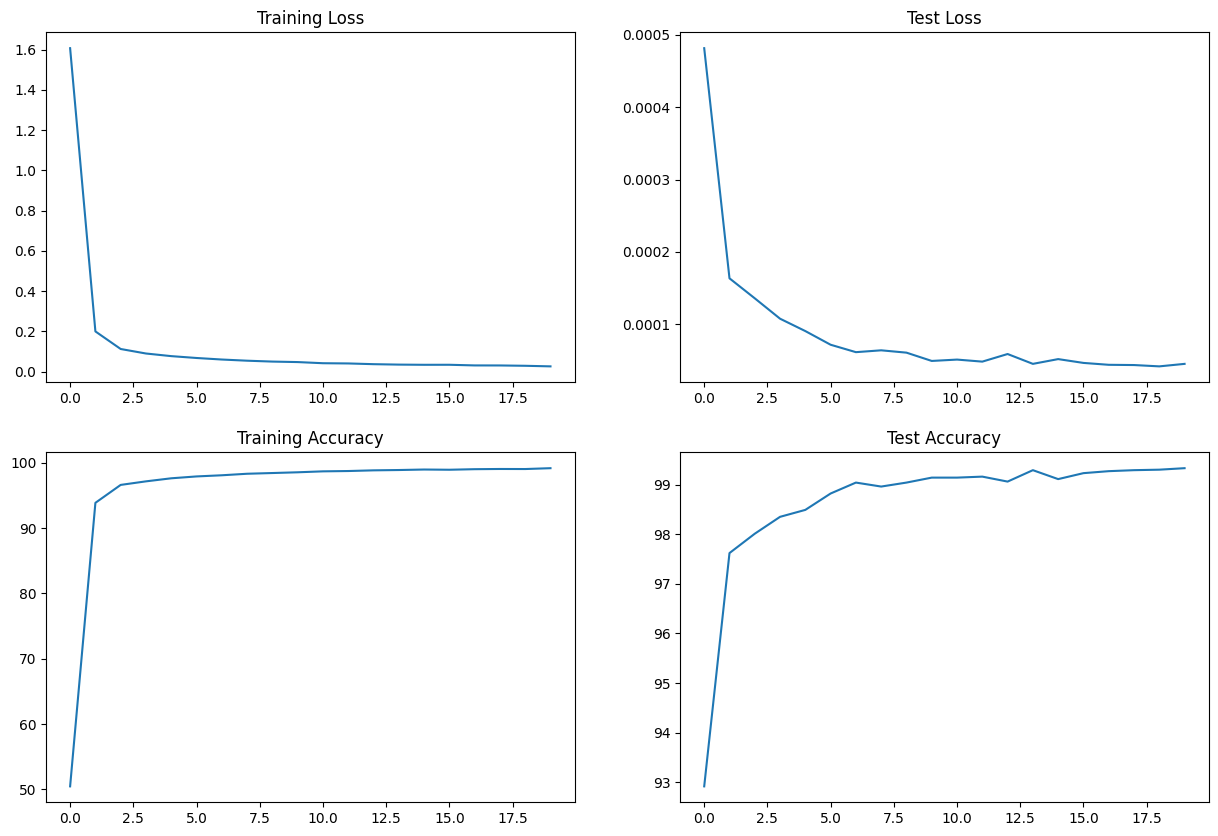

In [78]:
from model import getTrainingTestPlots
getTrainingTestPlots(train_losses, test_losses, train_acc, test_acc)